In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
df = pd.read_csv("wholesale.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
def clean(name):
  return name.lower().strip().replace(" ", "_")

In [6]:
df.rename(columns = clean, inplace = True)

In [7]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

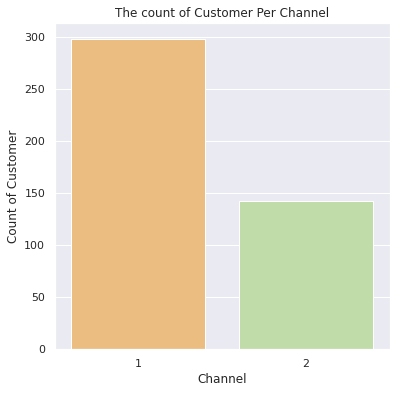

In [13]:
sns.set()
plt.figure(figsize = (6,6))
ax = sns.countplot(df.channel, palette='Spectral')
plt.title("The count of Customer Per Channel")
ax.set_xlabel("Channel")
ax.set_ylabel("Count of Customer")
plt.show()

In [14]:
df.isna().sum()

channel             0
region              0
fresh               0
milk                0
grocery             0
frozen              0
detergents_paper    0
delicassen          0
dtype: int64

In [15]:
# Separate the data
X =  df.drop("channel", axis = 1)
y = df["channel"]

In [16]:
X.shape

(440, 7)

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [18]:
# Scaling the data
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled  =  scaler.fit_transform(X_train)
X_test_scaled  =  scaler.transform(X_test)

In [23]:
# Fitting the model with KFOld 
from sklearn.model_selection import  KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
classifier   = [
                 
                 LogisticRegression(), 
                 KNeighborsClassifier(),
                 SVC(),
                 DecisionTreeClassifier(),
                 RandomForestClassifier(),
                 GaussianNB()
]

In [25]:
kf = KFold(n_splits=10, random_state = True , shuffle = True)
for clf in classifier:
  score = cross_val_score(clf, X_train_scaled, y_train, cv = kf)
  print(clf.__class__.__name__ , " CF  score mean is ", score.mean())

LogisticRegression  CF  score mean is  0.911984126984127
KNeighborsClassifier  CF  score mean is  0.9003968253968255
SVC  CF  score mean is  0.9004761904761904
DecisionTreeClassifier  CF  score mean is  0.871984126984127
RandomForestClassifier  CF  score mean is  0.911984126984127
GaussianNB  CF  score mean is  0.911984126984127


In [26]:
# We will go with the Random Forest
rfe = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators=100)
rfe.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
y_pred = rfe.predict(X_test_scaled)

In [28]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
print(accuracy_score(y_test,y_pred))

0.9318181818181818


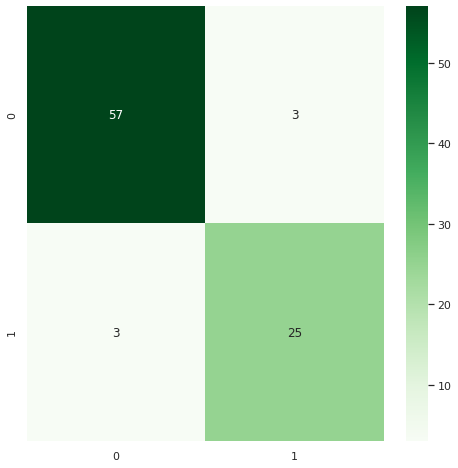

In [33]:
conf = confusion_matrix(y_test,y_pred)
sns.set()
plt.figure(figsize= (8,8))
sns.heatmap(conf, cmap = "Greens", annot = True, fmt = ".2g")
plt.show()

In [40]:
# Tuning the Random_Forest
from sklearn.model_selection import GridSearchCV
ref_tuned = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators':[100,200,500],
    'max_depth' : [4,6],
    'min_samples_leaf': [0.1, 1, 10]
}
gsv = GridSearchCV(ref_tuned, param_grid, scoring = "accuracy", cv=10, n_jobs = -1)

In [41]:
gsv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [42]:
gsv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
gsv.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'n_estimators': 200}

In [44]:
gsv.best_score_

0.920079365079365

In [45]:
finalized_model = RandomForestClassifier(**gsv.best_params_, random_state=42 )

In [46]:
finalized_model.fit(X_train_scaled, y_train)
y_pred = finalized_model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9204545454545454


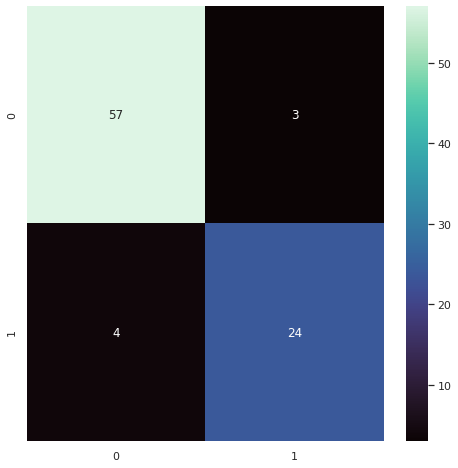

In [49]:
conf = confusion_matrix(y_test,y_pred)
sns.set()
plt.figure(figsize= (8,8))
sns.heatmap(conf, cmap = "mako", annot = True, fmt = ".2g")
plt.show()

In [54]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
num_col = df.drop(columns = ["channel", "region"])

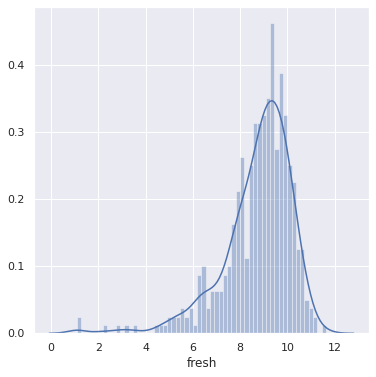

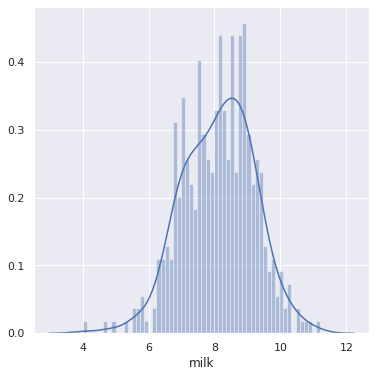

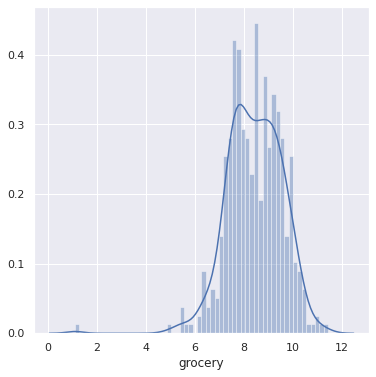

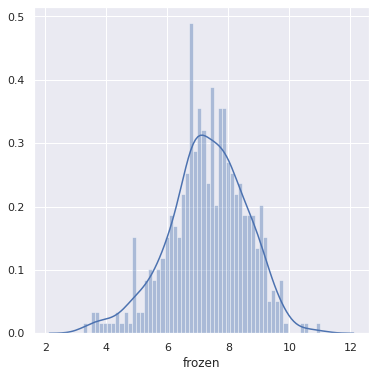

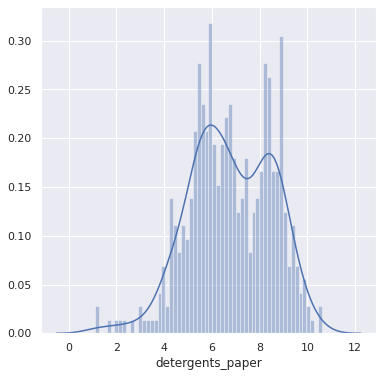

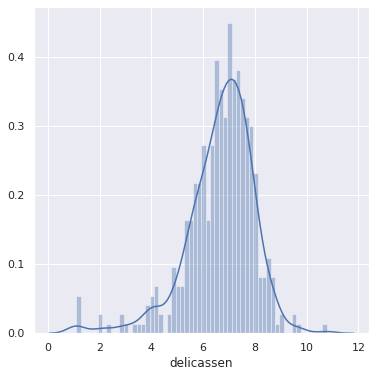

In [58]:
for i in num_col.columns.to_list():
  sns.set()
  plt.figure(figsize = (6,6))
  sns.distplot(np.log(num_col[i]), bins =58)
  plt.show ()

In [59]:
num_col = np.log(num_col)

In [61]:
df[num_col.columns.to_list()] = num_col

In [62]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,2,3,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,2,3,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,1,3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,2,3,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [63]:
X = df.drop("channel", axis = 1)
y = df["channel"]

In [64]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [65]:
stand_scaler = StandardScaler()
X_train_scaled = stand_scaler.fit_transform(X_train)
X_test_scales = stand_scaler.transform(X_test)
rfe2 = RandomForestClassifier(max_depth=4, n_estimators=200, random_state = 42, class_weight='balanced')

In [66]:
rfe2.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
y_predict = rfe2.predict(X_test_scales)

In [69]:
conf = confusion_matrix(y_test,y_predict)

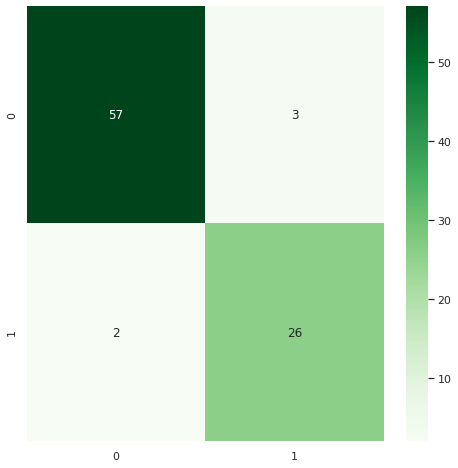

In [70]:
sns.set()
plt.figure(figsize= (8,8))
sns.heatmap(conf, cmap = "Greens", annot = True, fmt = ".2g")
plt.show()

In [73]:
print("Final Accuracy Score is ",round(accuracy_score(y_test, y_predict)*100, 2))

Final Accuracy Score is  94.32


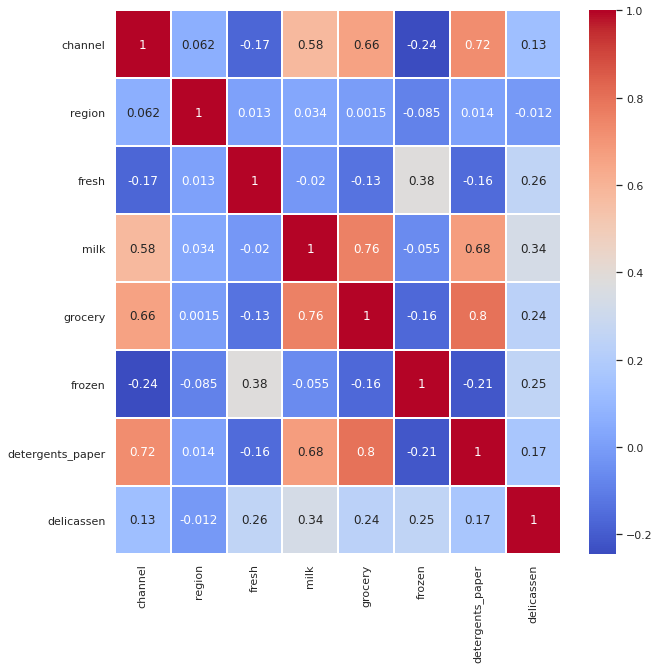

In [74]:
sns.set()
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm", linewidths=1)
plt.show()